####  **Import necessary libraries**

In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

**Information of Data Set**

In [5]:
#Info of data set
import pandas as pd
news_data=pd.read_csv('news.csv')
print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


####  **Read and explore the dataset**

In [7]:
news_data= pd.read_csv("news.csv")
news_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [8]:
news_data.tail(10)

,Unnamed: 0,title,text,label
6325,8411,Will the Media Reset After the Election or Are...,Written by Peter Van Buren venerable New Yor...,FAKE
6326,6143,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,DOJ COMPLAINT: Comey Under Fire Over Partisan ...,FAKE
6327,3262,GOP Senator David Perdue Jokes About Praying f...,The freshman senator from Georgia quoted scrip...,REAL
6328,9337,Radio Derb Is On The Air–Leonardo And Brazil’s...,,FAKE
6329,8737,Assange claims ‘crazed’ Clinton campaign tried...,Julian Assange has claimed the Hillary Clinton...,FAKE
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [9]:
#data cleaning
#checking missing values
news_data.isna()

,Unnamed: 0,title,text,label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
6330,False,False,False,False
6331,False,False,False,False
6332,False,False,False,False
6333,False,False,False,False


In [10]:
#to fill the missing values
news_data.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [11]:
news_data.shape

(6335, 4)

In [12]:
news_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

In [13]:
labels= news_data.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [14]:
#To fill NA/NAN values using the specified value
news_data["title"].fillna(0, inplace=True)
news_data["text"].fillna(0, inplace=True)
news_data["label"].fillna(0, inplace=True)

In [15]:
#Checking for the missing values after filling the numerical values
news_data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [ ]:
news_data['title']

0                            You Can Smell Hillary’s Fear
1       Watch The Exact Moment Paul Ryan Committed Pol...
2             Kerry to go to Paris in gesture of sympathy
3       Bernie supporters on Twitter erupt in anger ag...
4        The Battle of New York: Why This Primary Matters
                              ...                        
6330    State Department says it can't find emails fro...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332    Anti-Trump Protesters Are Tools of the Oligarc...
6333    In Ethiopia, Obama seeks progress on peace, se...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: title, Length: 6335, dtype: object

In [ ]:
#To Fill the categorical values
news_data['title'].value_counts()

OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
                                                                                                     ..
This Year’s Mammogram Month Launched With Devastating Report On Harms, Lack Of Effectiveness          1
Trump Reveals American Muslim Solution                                                                1
Fox News Gets Destroyed While Trying To Blame Hillary Clinton For GOP Email Scandal                   1
Jeh Johnson calls for increased vigilance after Mall of America 

**Data** **Cleaning**

In [16]:
#Checking for missing values and cleaning
news_data=news_data.dropna()
print(news_data.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


**Data Manipulation**

In [17]:
import pandas as pd

# Step 1: Load your dataset
news_data = pd.read_csv("news.csv")

# Step 2: Handling Missing Values
# Assuming 'text' and 'label' columns are crucial, we'll drop rows with missing values in these columns.
news_data.dropna(subset=['text', 'label'], inplace=True)

# Step 3: Data Cleaning and Preprocessing

# 3.1 Lowercase the text
news_data['text'] = news_data['text'].str.lower()

# 3.2 Remove punctuation (customize as needed)
news_data['text'] = news_data['text'].str.replace('[^\w\s]', '')

# 3.3 Tokenization and other text preprocessing steps can be added here if necessary.

# Step 4: Data Exploration (Optional)

# 4.1 Display the first few rows
print(news_data.head())

# Step 5: Data Splitting (Train-Test Split, Optional)

# Split the data into features (X) and labels (y)
X = news_data['text']
y = news_data['label']

# Split the data into training and testing sets (adjust the test_size and random_state as needed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Data Saving (Optional)

# Save the cleaned and preprocessed dataset to a new CSV file
news_data.to_csv("cleaned_news_data.csv", index=False)
print(news_data.to_csv)


<ipython-input-17-3456749da4f1>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  news_data['text'] = news_data['text'].str.replace('[^\w\s]', '')


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  daniel greenfield a shillman journalism fellow...  FAKE  
1  google pinterest digg linkedin reddit stumbleu...  FAKE  
2  us secretary of state john f kerry said monday...  REAL  
3   kaydee king kaydeeking november 9 2016 the le...  FAKE  
4  its primary day in new york and frontrunners h...  REAL  
<bound method NDFrame.to_csv of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan 

**Data** **Visualization**

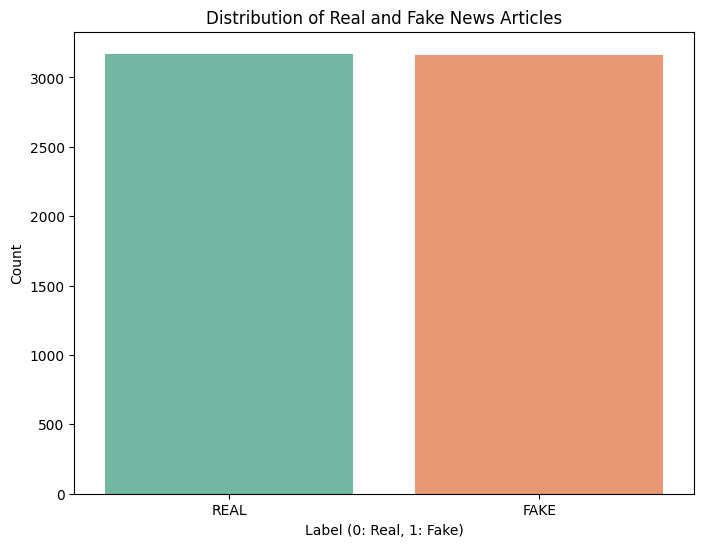

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
news_data = pd.read_csv("news.csv")

# Assuming you have a 'label' column indicating real (0) or fake (1) news
# Count the number of real and fake news articles
label_counts = news_data['label'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="Set2")
plt.title("Distribution of Real and Fake News Articles")
plt.xlabel("Label (0: Real, 1: Fake)")
plt.ylabel("Count")

# Show the plot
plt.show()

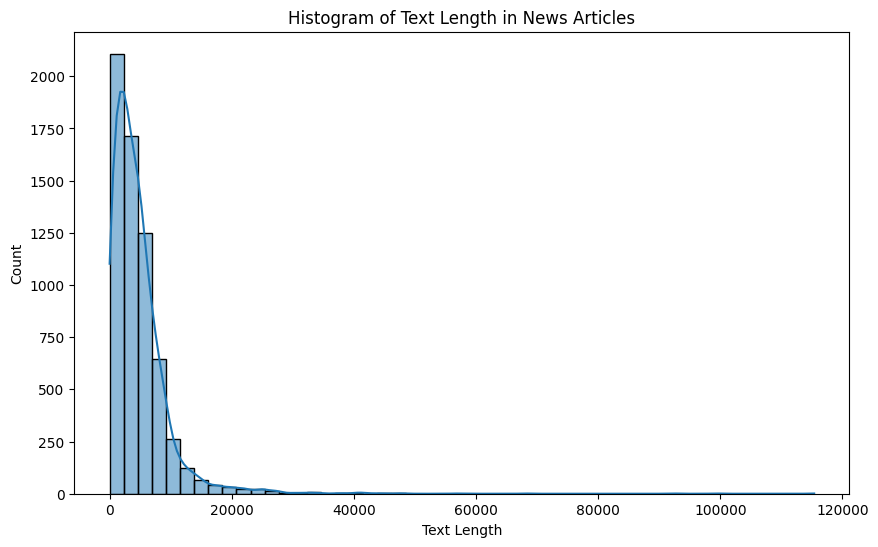

In [19]:
# Calculate text lengths
news_data['text_length'] = news_data['text'].apply(len)

# Create a histogram of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=news_data, x='text_length', bins=50, kde=True)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Histogram of Text Length in News Articles')
plt.show()


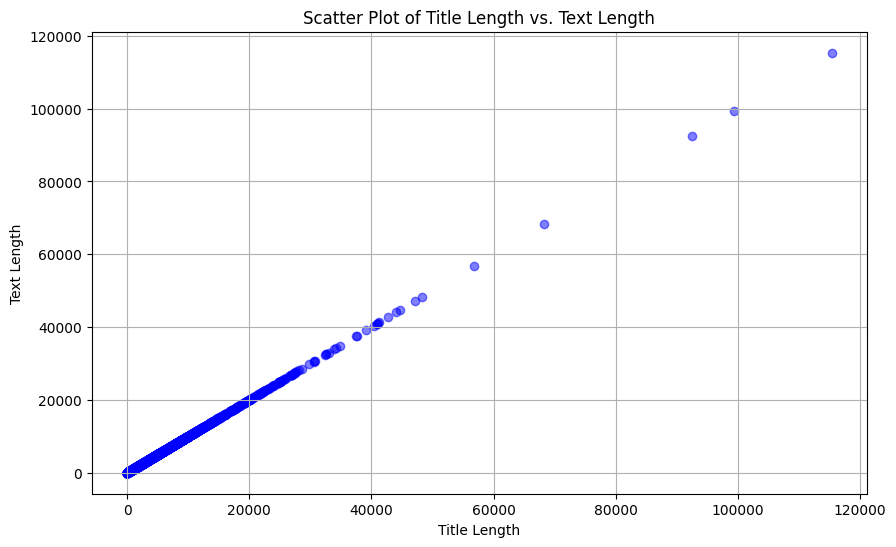

In [20]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(news_data['text_length'], news_data['text_length'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Title Length vs. Text Length')
plt.xlabel('Title Length')
plt.ylabel('Text Length')
plt.grid(True)
plt.show()

**Identifying the columns contributing for the prediction**

In [34]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load your dataset (replace "news_data.csv" with your dataset file)
news_data = pd.read_csv("news.csv")

# Assuming you have already performed data cleaning and preprocessing.

# Extract features (X) and labels (y)
X = news_data['text']  # Assuming you want to use the 'text' column as a feature
y = news_data['label']  # Assuming 'label' is your target variable

# Vectorize text data (e.g., using TF-IDF or Count Vectorization)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust the number of features
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Select the top K features using the chi-squared test (you can adjust the value of K)
k_best = SelectKBest(score_func=chi2, k=1000)  # Adjust 'k' based on your dataset
X_new = k_best.fit_transform(X_tfidf, y)

# Get the selected feature names (words or terms)
selected_feature_names = [tfidf_vectorizer.get_feature_names_out()[i] for i in k_best.get_support(indices=True)]

# Print the selected feature names
print(selected_feature_names)

['01', '02', '03', '07', '08', '09', '1973', '2008', '2012', '2013', '2016', '2017', '237', '26', '27', '28', '29', '31', '43', '8th', 'aa', 'abaaoud', 'abdeslam', 'abdulazeez', 'abedin', 'abortion', 'about', 'acknowledged', 'add', 'adding', 'administration', 'admiral', 'advertisement', 'advertisers', 'advisers', 'advocates', 'affordable', 'afp', 'afternoon', 'agents', 'agreement', 'ahead', 'aides', 'aleppo', 'alexandra', 'alien', 'also', 'among', 'amy', 'analyses', 'ancient', 'and', 'animals', 'announced', 'anonymous', 'anthony', 'appeal', 'appeals', 'applause', 'approach', 'april', 'arabia', 'argued', 'argument', 'ariz', 'arnaldo', 'article', 'articles', 'as', 'asked', 'assange', 'associated', 'at', 'attack', 'attackers', 'attacks', 'attribution', 'audience', 'aumf', 'australian', 'author', 'authorities', 'authorization', 'authorized', 'backers', 'backing', 'baltic', 'baltimore', 'banana', 'bank', 'bannon', 'barack', 'base', 'belgian', 'below', 'ben', 'benghazi', 'bergdahl', 'bernard

####  **Build the model**

In [35]:
#First, we split the dataset into train & test samples:
x_train, x_test, y_train, y_test= train_test_split(news_data["text"], labels, test_size= 0.4, random_state= 7)

In [36]:
#Then we’ll initialize TfidfVectorizer with English stop words
vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=vectorizer.fit_transform(x_train)
tfidf_test=vectorizer.transform(x_test)

In [37]:
#Create a PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier(max_iter=50)
passive.fit(tfidf_train,y_train)

y_pred=passive.predict(tfidf_test)
print(y_pred)

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']


In [40]:
#Create a confusion matrix
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[1186,   84],
       [  86, 1178]])

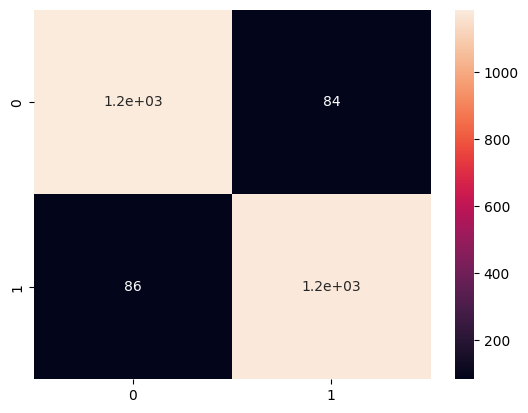

In [41]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

####  **Evaluate the model's accuracy**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace "news_data.csv" with your dataset file)
news_data = pd.read_csv("news.csv")

# Assuming you have already performed data cleaning and preprocessing.

# Split the data into training and testing sets
X = news_data['text']  # Features
y = news_data['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize text data (using TF-IDF in this example)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # You can adjust the number of features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a simple classifier (e.g., Naive Bayes)
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_tfidf)

# Assess the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

        FAKE       0.92      0.89      0.90       628
        REAL       0.89      0.92      0.91       639

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



In [43]:
#Calculate the model's accuracy
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

90.4498816101026

In [32]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.92      0.89      0.90       628
        REAL       0.89      0.92      0.91       639

    accuracy                           0.90      1267
   macro avg       0.91      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267

